# Coronavirus Pandemic in Brazil
### Project Data - 07/26/2021


- New Cases
- New Deaths
- Vaccination

[1] Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al - A global database of COVID-19 vaccinations (2021). https://ourworldindata.org/covid-vaccinations?country=BRA<p><p>
    
Last Update: 05/19/2022 - 22:38:31  (24 hour format, in UTC)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [2]:
url_data = 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true'

df = pd.read_csv(url_data)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
df_brazil = df.loc[df['location'] == 'Brazil']
df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
23596,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23597,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23598,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23599,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
23600,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [4]:
df_brazil.shape

(818, 67)

In [5]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 23596 to 24413
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    818 non-null    object 
 1   continent                                   818 non-null    object 
 2   location                                    818 non-null    object 
 3   date                                        818 non-null    object 
 4   total_cases                                 818 non-null    float64
 5   new_cases                                   816 non-null    float64
 6   new_cases_smoothed                          811 non-null    float64
 7   total_deaths                                798 non-null    float64
 8   new_deaths                                  797 non-null    float64
 9   new_deaths_smoothed                         792 non-null    float64
 10  total_ca

In [6]:
df_brazil_vac = df_brazil.loc[df['people_vaccinated'] >= 1]
df_brazil_vac[['date','people_vaccinated']]

,date,people_vaccinated
23922,2021-01-17,112.0
23923,2021-01-18,1109.0
23924,2021-01-19,13527.0
23925,2021-01-20,105824.0
23926,2021-01-21,193699.0
...,...,...
24406,2022-05-16,183142928.0
24408,2022-05-18,183205522.0
24409,2022-05-19,183241820.0
24410,2022-05-20,183251237.0



## Data Visualization

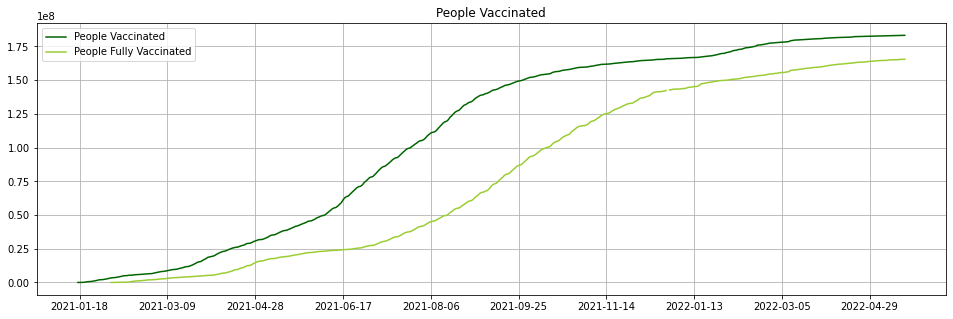

In [7]:
# vaccinations
plt.figure(figsize=(16.3,5))
plt.title('People Vaccinated')
plt.xticks(range(1, (np.size(df_brazil_vac['date']) + 1), 50))

plt.plot(df_brazil_vac['date'], df_brazil_vac['people_vaccinated'], c='darkgreen', label='People Vaccinated')
plt.plot(df_brazil_vac['date'], df_brazil_vac['people_fully_vaccinated'], c='yellowgreen', label='People Fully Vaccinated')

plt.legend()
plt.grid(True)
plt.show()

In [8]:
# statistics

br_vac = max(df_brazil_vac['people_vaccinated'])
br_fully_vac = df_brazil_vac['people_fully_vaccinated']
br_fully_vac = max(br_fully_vac.dropna())
br_pop = 213317639 #Brazil IBGE 2021 - population

print(f'People Vaccinated: {round((br_vac/br_pop)*100, 2)}%\nPeople Fully Vaccinated: {round((br_fully_vac/br_pop)*100, 2)}%')

People Vaccinated: 85.91%
People Fully Vaccinated: 77.59%


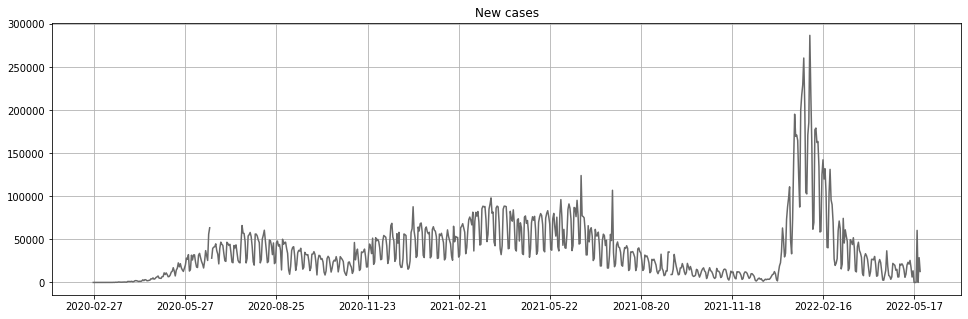

In [9]:
# cases
plt.figure(figsize=(16.3,5))
plt.title('New cases')

plt.xticks(range(1, (np.size(df_brazil['date']) + 1), 90))
plt.plot(df_brazil['date'], df_brazil['new_cases'], c='dimgrey')

plt.grid(True)
plt.show()

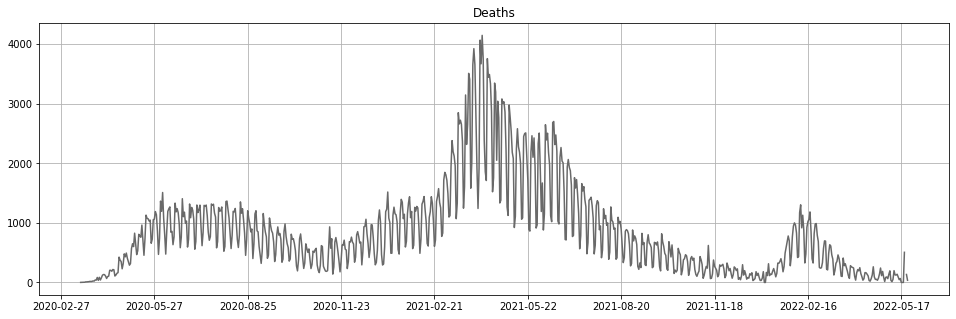

In [10]:
# deaths
plt.figure(figsize=(16.3,5))
plt.title('Deaths')

plt.xticks(range(1, (np.size(df_brazil['date']) + 1), 90))
plt.plot(df_brazil['date'], df_brazil['new_deaths'], c='dimgrey')

plt.grid(True)
plt.show()

## UTC Time Now

In [11]:
from datetime import datetime

now = datetime.utcnow()
print(f'Last Update: {now}')

Last Update: 2022-05-25 01:57:13.894367
